In [1]:
import pandas as pd
import torch
import sys
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.utils.data import random_split

sys.path.append("../..")
from src.vae_architectures.lstm import LSTMVariationalAutoEncoder
from src.dataset import ExerciseDataset
from src.trainer import VariationalAutoEncoderTrainer

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = torch.manual_seed(0)

In [3]:
squat_dct_train_df = pd.read_csv("../../data/train/dct/squat.csv")
squat_dct_test_df = pd.read_csv("../../data/test/dct/squat.csv")


squat_dct_train_dataset = ExerciseDataset(squat_dct_train_df, representation="dct")
squat_dct_test_dataset = ExerciseDataset(squat_dct_test_df, representation="dct")

batch_size = 8
squat_dct_train_dl = DataLoader(
    squat_dct_train_dataset,
    batch_size=batch_size,
    shuffle=True,
)
squat_dct_test_dl = DataLoader(
    squat_dct_test_dataset,
    batch_size=batch_size,
    shuffle=True,
)

In [4]:
NUM_JOINTS = 15
SEQUENCE_LENGTH = 25

LATENT_SIZE = 64
NUM_LAYERS = 4
HIDDEN_SIZE = 128

In [5]:
dct_lstm_autoencoder = LSTMVariationalAutoEncoder(
    SEQUENCE_LENGTH, NUM_JOINTS * 3, HIDDEN_SIZE, LATENT_SIZE, NUM_LAYERS
)
loss_fn = torch.nn.MSELoss(reduction="sum")
lr = 0.001
optimizer = torch.optim.Adam(dct_lstm_autoencoder.parameters(), lr)

/Users/hubert/Github-Repositories/explainable-methods-in-exercise-analysis/.env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
trainer = VariationalAutoEncoderTrainer(
    dct_lstm_autoencoder,
    squat_dct_train_dl,
    squat_dct_test_dl,
    loss_fn,
    optimizer,
    device,
)
results = trainer.train(
    num_epochs=350, weights_path="../../models/dct_lstm_autoencoder.pt"
)

  0%|          | 0/14 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 26.86it/s]

tensor(318.7290) tensor(2.2190)
tensor(309.4200) tensor(2.2189)
tensor(425.3932) tensor(2.2206)
tensor(25.9543) tensor(0.2771)
2024-04-12 12:01:42,076: INFO     Epoch 1/350: Val Loss: 1086.4320983886719, Train Loss: 5375.961776733398



100%|██████████| 14/14 [00:00<00:00, 29.80it/s]

tensor(312.4988) tensor(0.2676)
tensor(389.5512) tensor(0.2676)
tensor(267.3080) tensor(0.2674)
tensor(28.3925) tensor(0.0334)
2024-04-12 12:01:42,576: INFO     Epoch 2/350: Val Loss: 998.5865707397461, Train Loss: 4850.884506225586



100%|██████████| 14/14 [00:00<00:00, 29.20it/s]

tensor(246.8807) tensor(0.1097)
tensor(216.7283) tensor(0.1098)
tensor(283.6057) tensor(0.1105)
tensor(16.3746) tensor(0.0136)
2024-04-12 12:01:43,087: INFO     Epoch 3/350: Val Loss: 763.9329586029053, Train Loss: 4261.905197143555



100%|██████████| 14/14 [00:00<00:00, 27.24it/s]


tensor(92.2622) tensor(1.2077)
tensor(85.9811) tensor(1.2165)
tensor(91.9171) tensor(1.2074)
tensor(11.0269) tensor(0.1505)
2024-04-12 12:01:43,634: INFO     Epoch 4/350: Val Loss: 284.96942234039307, Train Loss: 2316.415382385254


100%|██████████| 14/14 [00:00<00:00, 29.12it/s]


tensor(69.5167) tensor(1.9609)
tensor(68.8331) tensor(1.9539)
tensor(66.5063) tensor(1.9887)
tensor(8.7117) tensor(0.2407)
2024-04-12 12:01:44,184: INFO     Epoch 5/350: Val Loss: 219.71209716796875, Train Loss: 937.0794277191162


100%|██████████| 14/14 [00:00<00:00, 28.08it/s]

tensor(58.6560) tensor(0.5839)
tensor(65.3387) tensor(0.6028)
tensor(51.0177) tensor(0.5780)
tensor(6.8873) tensor(0.0627)
2024-04-12 12:01:44,713: INFO     Epoch 6/350: Val Loss: 183.7271375656128, Train Loss: 741.8354415893555



100%|██████████| 14/14 [00:00<00:00, 29.22it/s]

tensor(49.0797) tensor(1.4018)
tensor(62.2578) tensor(1.7569)
tensor(60.5602) tensor(1.8521)
tensor(6.4039) tensor(0.2311)
2024-04-12 12:01:45,223: INFO     Epoch 7/350: Val Loss: 183.54357051849365, Train Loss: 678.6474494934082



100%|██████████| 14/14 [00:00<00:00, 28.31it/s]

tensor(46.6948) tensor(1.0053)
tensor(62.8764) tensor(1.1734)
tensor(54.7662) tensor(1.2533)
tensor(5.2560) tensor(0.0433)
2024-04-12 12:01:45,748: INFO     Epoch 8/350: Val Loss: 173.0685305595398, Train Loss: 630.3904895782471



 29%|██▊       | 4/14 [00:00<00:00, 24.87it/s]

In [ ]:
print(min([result["train_loss"] for result in results[10:]]))

265.8308744430542


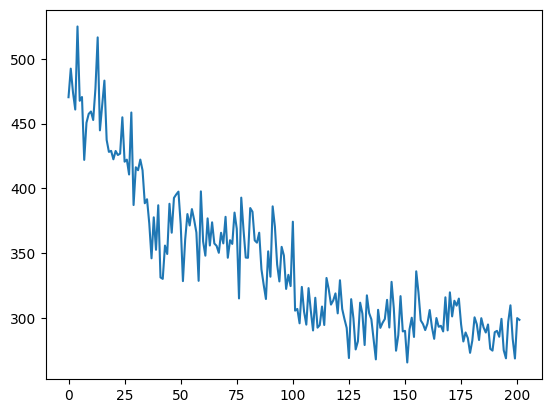

In [ ]:
plt.plot([result["train_loss"] for result in results[10:]], label="train")

In [ ]:
dct_lstm_autoencoder.load_state_dict(
    torch.load(
        "../../models/dct_lstm_autoencoder.pt", map_location=torch.device("cpu")
    )
)

<All keys matched successfully>

Text(0.5, 1.0, 'decoded signal')

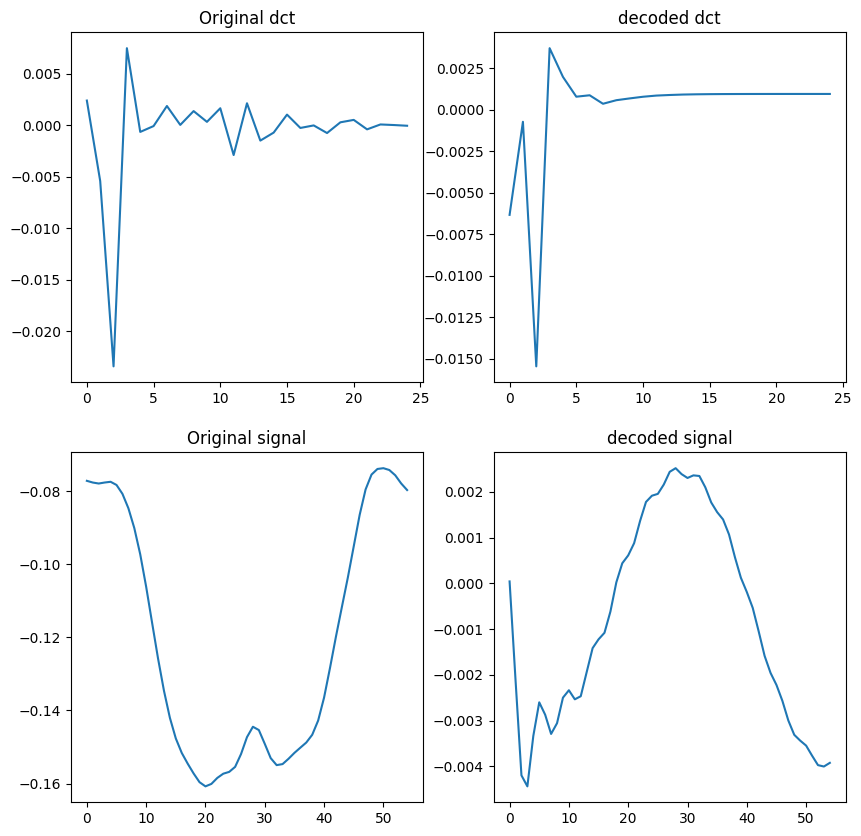

In [ ]:
import numpy as np
from scipy.fft import idct

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
dl_iter = iter(squat_dct_train_dl)
X = next(dl_iter)[0]
X = X[0].to(device).unsqueeze(0)
X_hat, _, _ = dct_lstm_autoencoder(X)

axes[0][0].plot(X.squeeze().detach().numpy()[:, 29])
axes[0][0].set_title("Original dct")

original_signal = X.squeeze()[:, 30]
x_dct = np.zeros(55, dtype=float)
x_dct[:25] = original_signal
original_signal = idct(x_dct, norm="ortho")

axes[1][0].plot(original_signal)
axes[1][0].set_title("Original signal")

axes[0][1].plot(X_hat.squeeze().detach().numpy()[:, 29])
axes[0][1].set_title("decoded dct")

new_signal = X_hat.squeeze().detach().numpy()[:, 29]
x_dct = np.zeros(55, dtype=float)
x_dct[:25] = new_signal
new_signal = idct(x_dct, norm="ortho")

axes[1][1].plot(new_signal)
axes[1][1].set_title("decoded signal")

In [ ]:
from src.utils.data import decode_dct

sample_id = 10

X_signal = decode_dct(squat_dct_test_dl.dataset.data[sample_id], squat_dct_test_dl.dataset.lengths[sample_id])

X_hat_dct, _, _ = dct_lstm_autoencoder(squat_dct_test_dl.dataset.data[sample_id].unsqueeze(0))
X_hat = decode_dct(X_hat_dct, squat_dct_test_dl.dataset.lengths[sample_id])

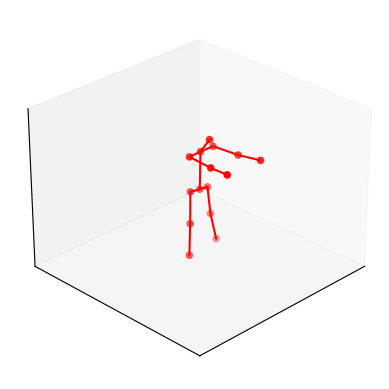

In [ ]:
from src.utils.visualization import get_3D_animation_comparison, get_3D_animation
from IPython.display import HTML


anim = get_3D_animation(X_signal)
HTML(anim.to_jshtml())


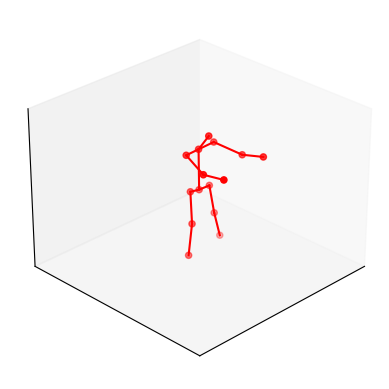

In [ ]:
anim = get_3D_animation(X_hat)
HTML(anim.to_jshtml())


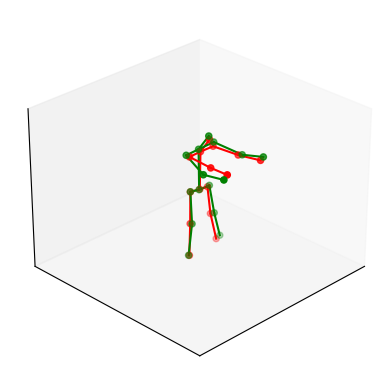

In [ ]:
comparison = get_3D_animation_comparison(X_signal, X_hat)
HTML(comparison.to_jshtml())